In [2]:
# Connor Lewis
# Michael Spearing
# Due: February 7, 2017 17:00

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.linalg import orth
import sympy

In [17]:
# Problem 1: Linear Algebra in Python
v1 = np.array([1,2,3,4])
v2 = np.array([0,1,0,1])
v3 = np.array([1,4,3,6])
v4 = np.array([2,11,6,15])
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html
matrix = np.vstack((v1,v2,v3,v4))
#http://docs.sympy.org/dev/tutorial/matrices.html
print("Origional Matrix: \n" + str(matrix))
reduce = sympy.Matrix(matrix).rref()
print("RREF form: \n" + str(reduce))

Origional Matrix: 
[[ 1  2  3  4]
 [ 0  1  0  1]
 [ 1  4  3  6]
 [ 2 11  6 15]]
RREF form: 
(Matrix([
[1, 0, 3, 2],
[0, 1, 0, 1],
[0, 0, 0, 0],
[0, 0, 0, 0]]), [0, 1])


In [18]:
# Problem 1: Linear Algebra in Python - Question 1
not_in_s = np.array([3,17,6,9])
matrix2 = np.vstack((matrix, not_in_s))
reduce2 = sympy.Matrix(matrix2).rref()
print(reduce2)
#because reduced matrix changed vector not_in_s is not in s
#to check if a vector is in s we would add it to the matrix and see if the 
#reduced matrix equaled the original reduced matrix

(Matrix([
[1, 0, 0,  -12],
[0, 1, 0,    1],
[0, 0, 1, 14/3],
[0, 0, 0,    0],
[0, 0, 0,    0]]), [0, 1, 2])


In [19]:
# Problem 1: Linear Algebra in Python - Question 2
print(np.linalg.matrix_rank(matrix))

2


In [33]:
# Problem 1: Linear Algebra in Python - Question 3
print(orth(np.array([[1,0,3,2],[0,1,0,1]])))

[[-0.98708746 -0.16018224]
 [-0.16018224  0.98708746]]


In [24]:
# Problem 1: Linear Algebra in Python - Question 4
min = "inf"
z_Star = [1,0,0,0]
for(???):
    

1


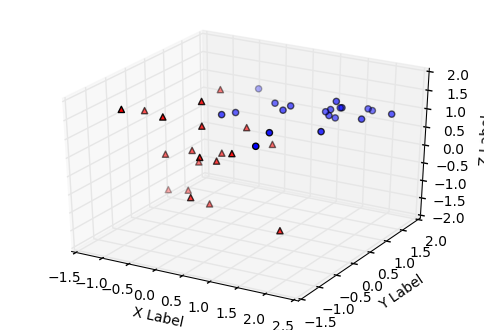

In [4]:
# Problem 2: PCA - Question 1
mean1 = [0,0,0]
n = 20
d = 3
cov_Matrix1 = [[0.5,0,0],[0,0.5,0],[0,0,0.7]]
mean2 = [1,1,1]
cov_Matrix2 = [[0.5,0,0],[0,0.5,0],[0,0,0.01]]

data1 = np.random.multivariate_normal(mean1, cov_Matrix1, n)
data2 = np.random.multivariate_normal(mean2, cov_Matrix2, n)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data1[:,0], data1[:,1], data1[:,2], c='r', marker='^')
ax.scatter(data2[:,0], data2[:,1], data2[:,2], c='b', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [ ]:
# Problem 2: PCA - Question 2

In [5]:
# Problem 2: PCA - Question 3
data_Agg = np.vstack((data1,data2))
print(data_Agg)
cov = np.cov(data_Agg, rowvar=False)
### ADD in the COVARIANCE CALCULATION
print("\n\n")
print(cov)

[[ 0.24564502 -0.69804315  0.55979782]
 [ 0.011566    0.23648654  0.07885282]
 [-0.8477848  -0.04688133 -0.03485154]
 [-0.01710222 -0.07276334 -1.16827887]
 [-0.07884937 -0.16019021  1.00850138]
 [ 0.56229142  0.8203203   0.14901303]
 [ 0.68707402 -0.49177379  0.67202903]
 [-0.88720866 -1.0729886   1.72342293]
 [-0.43329846  0.25313138 -0.30250667]
 [-0.64532973  1.18046393  1.13661566]
 [ 0.22297299  0.6113053   0.63097036]
 [ 0.1958448  -0.17866865  0.14895471]
 [-1.12631271  0.39011186 -1.37254392]
 [-1.21575935 -0.0486275   1.05793965]
 [-0.63136076  0.23370579 -1.14892416]
 [-0.11937206 -0.09873054  1.62271915]
 [-0.4275104  -0.672227    1.43423476]
 [ 1.62391457 -0.60014262 -1.08372542]
 [-0.39279368  0.02001779  0.16054876]
 [ 0.12251277 -0.77733227 -0.52271974]
 [ 1.10272295 -0.47647954  0.97557524]
 [ 0.02080718  0.60857038  0.98842396]
 [ 1.52202273  1.28646931  1.16102738]
 [ 2.2013283   1.64832276  0.97810411]
 [ 1.76771199  1.79919828  0.87615576]
 [ 1.35879732  1.50984454

In [102]:
# Problem 2: PCA - Question 4
data_Agg_Square = np.hstack((data_Agg,np.zeros(shape=(40,37))))
#print(np.linalg.matrix_rank(data_Agg_Square))
print(np.linalg.eig(data_Agg_Square))


(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.25056895, -0.18576777, -1.70927745]), array([[ 0.        ,  0.        ,  0.        , ..., -0.19796196,
        -0.02098851,  0.23529848],
       [ 0.        ,  0.        ,  0.        , ..., -0.10059387,
         0.02100458, -0.19666977],
       [ 0.        ,  0.        ,  0.        , ...,  0.09301972,
         0.01816456,  0.17351455],
       ..., 
       [ 0.        ,  0.        ,  0.        , ..., -0.03534637,
        -0.23395986,  0.00876396],
       [

In [4]:
# Problem 3: Low Rank Approximation of Mona Lisa (Connor)

In [ ]:
# Problem 4: Starting in Kaggle (Michael)